In [2]:
import os
import csv
import pandas as pd
import re
from dask import dataframe as dd

In [3]:
#Regex Aux Function for finding category name
def categoryName(text):
    #text = '{"id":292,"name":"Comedy","analytics_name":"Comedy","slug":"film & video/comedy","position":3,"parent_id":11,"parent_name":"Film & Video","color":16734574,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/film%20&%20video/comedy"}}}'
    r = re.search("([A-Z])\w+", text)
    return r.group(0)

In [4]:
#read the file:
#df = pd.read_csv("DECEMBER2022.csv")

ddf = dd.read_csv("data/*.csv")
data = ddf[["category","launched_at", "name", "state"]]

df = data.compute()

df = df[df.launched_at != 0]

# Convert the 'date' column to datetime
df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')

df['month'] = df['launched_at'].dt.month
df['year'] = df['launched_at'].dt.year

#make indices again:
df.set_index(['year','month'], inplace=True)

df['category'] = df['category'].map(lambda x: categoryName(x))

df

#iterate over the grouped dataframe and create separate dataframe
#for name, group in df_grouped:
#    print(name)
 #   print(group)

category         launched_at  \
year month                                
2022 12      Comedy 2022-12-09 02:52:44   
     12      Comedy 2022-12-08 10:32:36   
     12      Comedy 2022-12-07 22:07:37   
     12      Comedy 2022-12-06 13:59:22   
     12      Comedy 2022-12-03 02:49:41   
...             ...                 ...   
2020 3      Graphic 2020-03-13 18:11:29   
     3      Graphic 2020-03-12 22:49:03   
     3      Graphic 2020-03-11 13:30:03   
     3      Graphic 2020-03-11 00:00:03   
     3      Graphic 2020-03-10 21:55:31   

                                                        name       state  
year month                                                                
2022 12            Driving School Stories of Celebrity Teens      failed  
     12                 Crime Squad 3D Blu-ray - REMASTER3D!        live  
     12                          Help Us Get To Los Angeles!        live  
     12                                               SECRET        live  
     12                                    PINK (Short Film)        live  
...                                                      ...         ...  
2020 3                                             Fairy Boy  successful  
     3      Crucifix Executioner : The Epic 1hr Motion Comic  successful  
     3                              Ghost of the Gulag Vol.2  successful  
     3                              You're Stuck With Me Now  successful  
     3                                  Dino Beasts - book 2  successful  

[7631 rows x 4 columns]

In [5]:
df.sort_index(inplace=True)
df.reset_index(level='month', inplace=True)
df.reset_index(level='year', inplace=True)
df

,year,month,category,launched_at,name,state
0,2009,9,Webcomics,2009-09-13 20:04:59,Join the Multiplex: Book 1 Club of Awesome,successful
1,2009,12,Photo,2009-12-03 00:55:24,The Pixel Project: Impel an Aspiring Photojour...,successful
2,2010,4,Audio,2010-04-16 15:47:51,You Down with YPP?,successful
3,2010,5,Music,2010-05-04 13:11:30,Start a musical REVOLUTION with Collette!,successful
4,2010,7,Spaces,2010-07-19 21:26:13,Help SHE&HER PRODUCTIONS raise money for our n...,successful
...,...,...,...,...,...,...
7626,2022,12,Graphic,2022-12-01 23:00:22,Diet by Ignacio Noé and published by Embassy P...,live
7627,2022,12,Graphic,2022-12-01 21:13:17,Infinity City - A Sci-Fi Western Comic,live
7628,2022,12,Graphic,2022-12-01 15:33:48,Darkest Rout: Book One | A Graphic Novel,live
7629,2022,12,Graphic,2022-12-01 14:21:06,Bug Fight Comic Page,live


In [6]:
# Create a new column 'year_month' by concatenating the 'year' and 'month' columns
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

# If you want to keep the format of year-month-date
#df['year_month'] = pd.to_datetime(df[['year','month']].assign(day=1))

# drop the 'year' and 'month' columns
#df = df.drop(columns=['year', 'month'])

df.groupby('year_month')
df

,year,month,category,launched_at,name,state,year_month
0,2009,9,Webcomics,2009-09-13 20:04:59,Join the Multiplex: Book 1 Club of Awesome,successful,2009-9
1,2009,12,Photo,2009-12-03 00:55:24,The Pixel Project: Impel an Aspiring Photojour...,successful,2009-12
2,2010,4,Audio,2010-04-16 15:47:51,You Down with YPP?,successful,2010-4
3,2010,5,Music,2010-05-04 13:11:30,Start a musical REVOLUTION with Collette!,successful,2010-5
4,2010,7,Spaces,2010-07-19 21:26:13,Help SHE&HER PRODUCTIONS raise money for our n...,successful,2010-7
...,...,...,...,...,...,...,...
7626,2022,12,Graphic,2022-12-01 23:00:22,Diet by Ignacio Noé and published by Embassy P...,live,2022-12
7627,2022,12,Graphic,2022-12-01 21:13:17,Infinity City - A Sci-Fi Western Comic,live,2022-12
7628,2022,12,Graphic,2022-12-01 15:33:48,Darkest Rout: Book One | A Graphic Novel,live,2022-12
7629,2022,12,Graphic,2022-12-01 14:21:06,Bug Fight Comic Page,live,2022-12


<AxesSubplot: xlabel='year_month'>

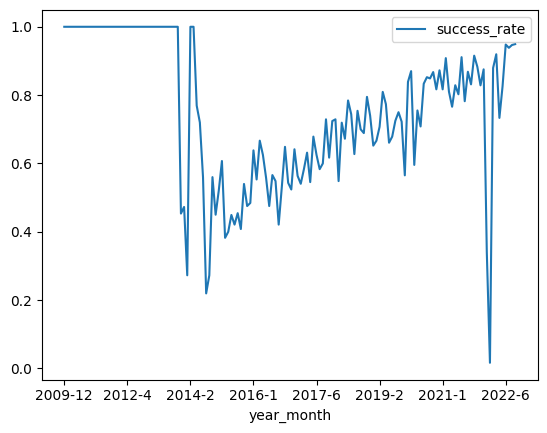

In [12]:
#Q1 Analysis and Graph (Faster)
#code success
dftemp = df
dftemp['success_rate'] = dftemp['state'].apply(lambda x: 1 if x == 'successful' else 0)
dftemp

#success rate per month:
dftemp2 = df
dftemp2['success_rate'] = dftemp['state'].apply(lambda x: 1 if x == 'successful' else 0)
success_rate_table = dftemp2.groupby(['year_month'])['success_rate'].mean().reset_index()
success_rate_table

#plotting success rate per month:
success_rate_table.plot(x='year_month', y='success_rate', kind='line')

In [7]:
#Q2 With Pivot Table (Faster)

dftemp = df
dftemp['success_rate'] = dftemp['state'].apply(lambda x: 1 if x == 'successful' else 0)

def categoryName(text):
    #text = '{"id":292,"name":"Comedy","analytics_name":"Comedy","slug":"film & video/comedy","position":3,"parent_id":11,"parent_name":"Film & Video","color":16734574,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/film%20&%20video/comedy"}}}'
    r = re.search("([A-Z])\w+", text)
    return r.group(0)

dftemp['category'] = dftemp['category'].map(lambda x: categoryName(x))

# Create the pivot table
success_rate_table = df.pivot_table(index='year_month', columns='category', values='success_rate', aggfunc='mean')
#success_rate_table = dftemp.groupby(['category', 'month'])['success_rate'].mean().reset_index()

success_rate_table

category,Architecture,Audio,Civic,Comedy,Cookbooks,DIY,Design,Graphic,Interactive,Letterpress,Literary,Music,Photo,Plays,Product,Sound,Spaces,Toys,Typography,Webcomics
year_month,,,,,,,,,,,,,,,,,,,,
2009-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2010-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-4,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-5,NaN,0.666667,NaN,1.0,0.666667,NaN,NaN,1.0,NaN,0.4,0.571429,0.000000,NaN,1.0,NaN,NaN,0.333333,NaN,NaN,0.545455
2022-6,1.0,1.000000,NaN,1.0,0.250000,NaN,1.0,1.0,1.0,NaN,0.555556,1.000000,0.0,1.0,1.0,1.0,0.500000,1.0,NaN,0.625000
2022-7,1.0,0.000000,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,0.400000,0.000000,0.0,1.0,1.0,1.0,1.000000,1.0,NaN,0.555556


In [11]:
#Q2 Graphing

def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

import plotly.graph_objects as go

categories = df['category'].unique()

fig = go.Figure(data=go.Heatmap(df_to_plotly(success_rate_table)))
fig.show()

20
